1.2 Since sine waves have energy at only one frequency (see Chapter 3), they can be used 
to probe the frequency characteristics of a filter (or other linear systems). Here, sine 
waves at several different frequencies are used as input to an analog filter. The input 
sine waves have a value of 1.0 V root mean square (RMS) and the output measured 
at each frequency is given below. Use MATLAB to plot the filter’s frequency characteristic. (As in all plots, label 
the axes correctly.) What type of filter is it? What is the cutoff frequency and order 
of this filter? Use the MATLAB grid function (grid on;) to help find the slope and 
cutoff frequency from the plot. [Hint: Since sine waves have energy at only one fre
quency, the frequency characteristics of the filter can be determined from the ratio 
of output to input (Equation 1.2). Take 20 log(Vout
 /Vin
 ) where Vin
 = 1.0 to get the 
gain in dB and use MATLAB’s semilogx to get a plot gain against log frequency. 
T
 his will allow you to estimate the spectral slope in dB/decade better.]

This is a highpass filter.
The cutoff frequency is approximately: 82.67 Hz
Slope of the Bode plot below cutoff frequency is: 96.80 dB/decade
The estimated order of the filter is: 4


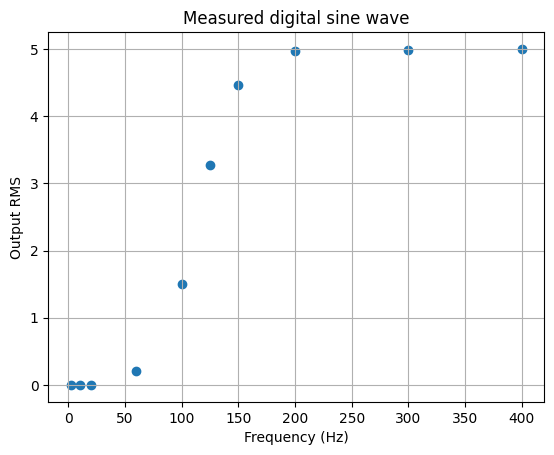

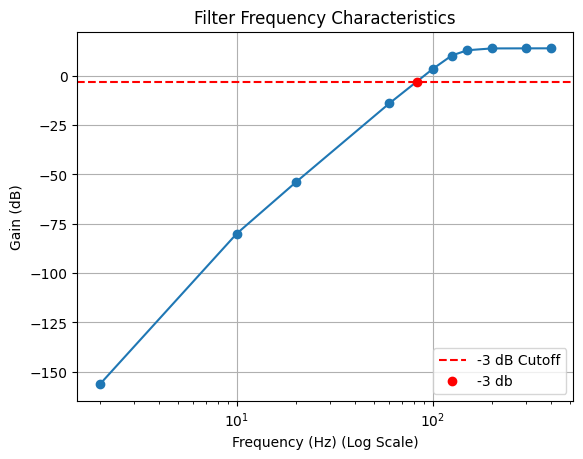

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

input_rms = 1
freq_output = [2,10,20,60,100,125,150,200,300,400]
output_rms = [0.15*10**(-7), 0.1*10**(-3), 0.002, 0.2, 1.5, 3.28, 4.47, 4.97, 4.99, 5.0]
output_rms

figure = plt.figure()
plt.scatter(freq_output, output_rms)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output RMS")
plt.title("Measured digital sine wave")

# Calculating gain
gain = 20 * np.log10(np.array(output_rms)/input_rms)
log_freq = np.log10(freq_output)

plt.figure()
plt.semilogx(freq_output, gain, marker="o")
plt.grid()
plt.xlabel("Frequency (Hz) (Log Scale)")
plt.ylabel("Gain (dB)")
plt.title("Filter Frequency Characteristics")
plt.axhline(-3, color="red", linestyle="--", label="-3 dB Cutoff")

# Finding cutoff frequency
cutoff_freq_db = -3
cutoff_freq_log = np.interp(cutoff_freq_db, gain, log_freq)
cutoff_freq =  10**cutoff_freq_log

plt.semilogx(cutoff_freq, cutoff_freq_db, "ro", label="-3 db")
plt.legend()

# Find the filter order by calculating slope of the bode plot
low_freq_range = (log_freq < cutoff_freq_log) 
slope_gain = linregress(log_freq[low_freq_range], gain[low_freq_range]).slope
filter_order = abs(slope_gain) // 20



print("This is a highpass filter.")
print(f"The cutoff frequency is approximately: {cutoff_freq:.2f} Hz")
print(f"Slope of the Bode plot below cutoff frequency is: {slope_gain:.2f} dB/decade")
print(f"The estimated order of the filter is: {filter_order:.0f}")



Write a MATLAB program to generate 1 s of a 5-Hz sine wave in a 1000-point array. 
(Use Equation N=T_T / T_s where T_T is total time and T_S is the sampling time to determine the equivalent Ts
 .) Plot the sine wave. Simulate the 
sampling of this waveform at 7 Hz by plotting a point (such as an “*”) at intervals 
of Ts
 = 1/fs
 = 1/7 s. (Use a for-loop to generate the sample time, Ts
 , insert it into the 
equation for the 5-Hz sine wave, and plot the resulting point.) Aliasing predicts that 
these sampled points should fall on a 2-Hz (7–5 Hz) sine wave. Can you find a 2-Hz 
sine wave that includes all seven points? [Hint: The sine wave could be phase shifted 
by 180°.]

Sampling time Ts for original signal with 5 Hz is: 1
Sampling time Ts for original signal with 7 Hz is: 0.14285714285714285
alias occurs when a signal is sampled at a rate fs that is
insufficient to capture its full frequency content - it violates the
nyquist criterion of fs>2*f_signal. the apparent or aliased frequency
of the signal can be calculated as f_alias = |f_s - f_signal| where
f_signal is the frequency of the analog signal I asusme and the f_s is
the sampling frequency of the digital signal. When the samplig
frequency of the digital signal is not bigger than that of twice the
signal frequency, it creates alias. The time array for the 7 Hz signal
is used because this is the time array of the digital signal. Sampling
a sine wave at frequency f_signal with the samplign rate of f_s causes
the sampled points to align with a sine wave of a lower frequency
f_alias. This occurs because the sampling process introduces periodic
overlap in the frequency domain. Aliasing also occurs when

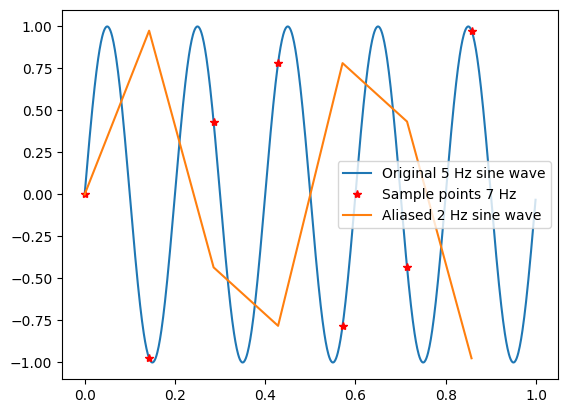

In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
import textwrap

# Parameters
t_t = 1
freq_analog = 5 # frequency of original sine wave Hz
freq_sampling = 7 # sampling frequency Hzz
N = 1000

# Generate
t_s_analog = t_t / N # Sampling time for the original signal at 5 Hz
t_s_digital = 1/freq_sampling # Sampling time for the new signal at 7 Hz

# Generate time arrays using the total time and sampling times
time_arr_1 = np.arange(0, t_t, t_s_analog)
time_arr_7 = np.arange(0,t_t, t_s_digital)

# Generate the two sine waves
sine_arr_5 = np.sin(freq_analog*2*np.pi*time_arr_1)
sine_arr_7 = np.sin(freq_analog*2*np.pi*time_arr_7)

plt.figure()
plt.plot(time_arr_1, sine_arr_5, label=f"Original {freq_analog} Hz sine wave")
plt.plot(time_arr_7, sine_arr_7, "r*",  label=f"Sample points {freq_sampling} Hz")

# Find aliased
alias_freq = np.abs(freq_sampling - freq_analog)
sine_alias = np.sin(2*np.pi*alias_freq*time_arr_7)

plt.plot(time_arr_7, sine_alias,  label=f"Aliased {alias_freq:.0f} Hz sine wave")
plt.legend()


print(f"Sampling time Ts for original signal with 5 Hz is: {t_t}")
print(f"Sampling time Ts for original signal with 7 Hz is: {t_s_digital}")
output = "alias occurs when a signal is sampled at a rate fs that is insufficient to capture its full frequency content - it violates the nyquist criterion of fs>2*f_signal. the apparent or aliased frequency of the signal can be calculated as f_alias = |f_s - f_signal| where f_signal is the frequency of the analog signal I asusme and the f_s is the sampling frequency of the digital signal. When the samplig frequency of the digital signal is not bigger than that of twice the signal frequency, it creates alias. The time array for the 7 Hz signal is used because this is the time array of the digital signal. Sampling a sine wave at frequency f_signal with the samplign rate of f_s causes the sampled points to align with a sine wave of a lower frequency f_alias. This occurs because the sampling process introduces periodic overlap in the frequency domain. Aliasing also occurs when in one cycle we sample less than 2 points or sample points that are not of equal distance away. When I tried new frequency of 15 Hz, two points were sampled in every cycle and had the same distance apart. Aliasing should not assume to happen unless the sampling frequency is less than 2* signal frequency. When the sampling frequency is less than that, 7 Hz, we see that two points per cycle do not get sampled or they are not of equal distance in every sample."

print("\n".join(textwrap.wrap(output, width=70)))